¿Qué es el aprendizaje profundo? 
Subcategoría del ML que crea diferentes niveles de abstracción que representa los datos


Además de datos numéricos, categóricos, ahora podremos usar otros tipos de datos como audios, imagenes, textos completos de libros, etc. Cada una de las capas (entrada, ocultas, salida) de una red neuronal divide informacción, cada una de estas capas aprende pequeñas secciones. 

Para poder aprender necesitamos una función de activación: ReLU.
¿Qué es ReLU? 
Función de activación, permite el paso de todos los valores positivos sin cambiarlos pero asigna todos los valores negativos a 0.


Red neuronal convolucional: 
Modelan de forma consecutiva pequeñas piezas de información, al final combinan información en las capas más profundas de la red.

¿Qué hace una red neuronal convolucional? Tiene una sección que divide su aprendizaje en pequeñas áreas (por ej. de la imagen) de esta forma se enfoca en aprender unicamente ciertas secciones de una imagen por ej.

Cada pequeña área de aprendizaje se unen en un conjunto de capas de entrada, ocultas y de salida. La capa de salida son nuestros pesos, dependiendo los pesos -que están relacionados a nuestras características- podemos encontras las relaciones. De esta manera, conociendo cada una de ellas, cada una de esas etapas, que es lo que va dividiendo unimos todo el aprendizaje, todo el conocimiento para asignarle una etiqueta.

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [0]:
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Tenemos 60.000 imagenes divididas de 28 x 28 pixeles.
train_images.shape

(60000, 28, 28)

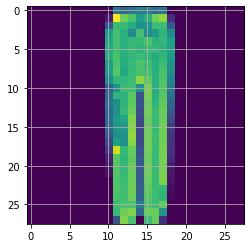

In [5]:
#Visualizamos los datos de la posición 422

plt.figure()
plt.imshow(train_images[1000])
plt.grid(True)

In [0]:
#dividimos las diferentes imagenes, para que solamente obtengamos cierta info para aprender y con la cual empezar el aprendizaje.

train_images = train_images / 255.0
test_images = test_images /255.0


In [0]:
%matplotlib inline

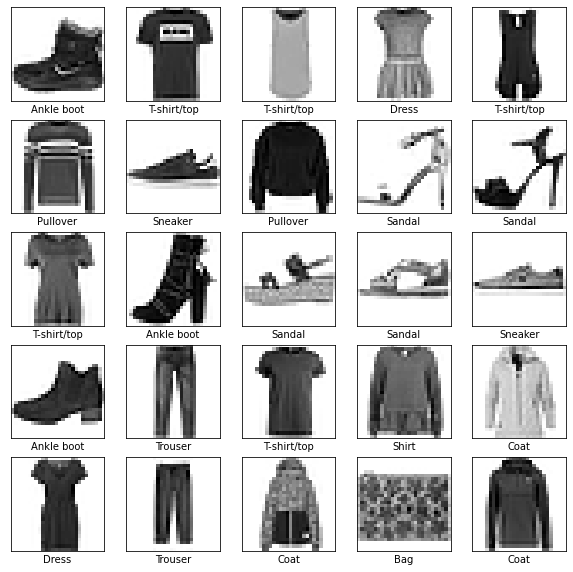

In [8]:
#no vamos a plotear todo porque es demasiado, solo 25 imagenes
plt.figure(figsize= (10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])


In [0]:
#Definimos nuestro modelo: creamos una sequencia que es la division de los elementos que nos permite entrenar.
#Cada una de estas secuencias en una de las etapas de las capas de nuestra red neuronal y tendremos que obtener unicamente lo necesario.
#Recordemos que son imagenes que hay que dividir, entonces input_shape es igual al tamaño de nuestras imagenes.
#Lo siguiente es asignar las diferentes etapas del aprendizaje, entre ellos la primera es la densidad, le decimos: 
#k.layer.dense decimos que es 168 y luego tenemos una función de activación relu.
#Lo siguiente es crear otra capa de la red que se encargue de aprender un poco más con otra función de activación: softmax.

model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), 
                          keras.layers.Dense(128, activation= tf.nn.relu),
                          keras.layers.Dense(10, activation= tf.nn.softmax)])

In [0]:
#Vamos a compilarlo. Creamos un optimizador, en 'loss' usamos un parámetro que nos permite dividir las diferentes etapas
#Luego le asignamos una metrica para evaluar si clasifica adecuadamente o no 
model.compile(optimizer= tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
#Hacemos el entrenamiento de nuestro modelo. Epochs es el numero de iteraciones para hacer el entrenamiento.

model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4975 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3735 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2984 - accuracy: 0.8899


In [12]:
#Evaluamos nuestro modelo. 
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8737
Accuracy:  0.8737000226974487


Tomo el conjunto de datos 313/313 (pequeño pero significativo para entrenar nuestros datos). Tiene el 87% de probabilidad de clasificar bien si ingresamos nuevos conjuntos de datos al modelo.

In [0]:
#Vamos a predecir nuestras imagenes de prueba (es decir, nuevos datos). 

predictions = model.predict(test_images)

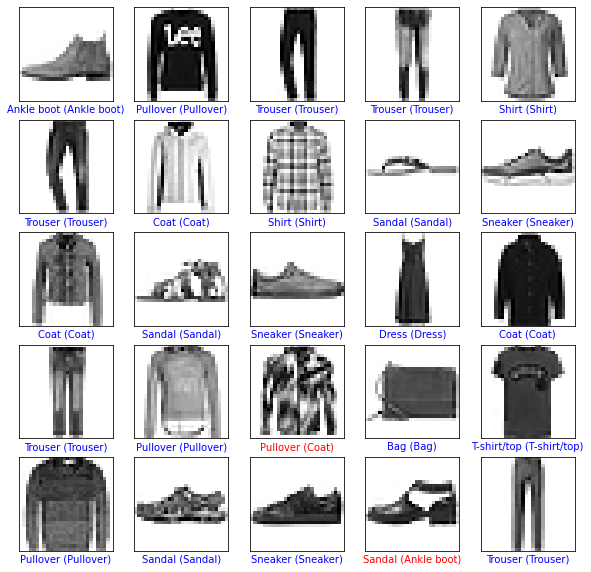

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap= plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else :
    color = 'red'
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)    

Azul: clasificó bien.

Rojo: clasificó mal.

Sin parentesis lo clasificado por la red neuronal convolucional. Entre parentesis lo que es.